In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('Real estate.csv')

print(df.head())



   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [3]:
# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [5]:

print(df.describe())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

In [6]:
print(df.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [7]:
# Define features (X) and target (y)
X = df.drop(columns=['Y house price of unit area'])  # Replace with the target column name if different
y = df['Y house price of unit area']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Option 1: Standard Scaling (mean = 0, standard deviation = 1)
standard_scaler = StandardScaler()
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_test_standard_scaled = standard_scaler.transform(X_test)




In [8]:
# Option 2: Min-Max Scaling (scales to [0, 1] range)
minmax_scaler = MinMaxScaler()
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)

# Display the shape of the scaled data
print("Shape of Standard Scaled Training Data:", X_train_standard_scaled.shape)
print("Shape of Min-Max Scaled Training Data:", X_train_minmax_scaled.shape)

Shape of Standard Scaled Training Data: (331, 7)
Shape of Min-Max Scaled Training Data: (331, 7)


Polynomial Regression (Degree 1) - MSE: 54.6020, R²: 0.6745
Polynomial Regression (Degree 2) - MSE: 41.9931, R²: 0.7497
Polynomial Regression (Degree 3) - MSE: 1650.6608, R²: -8.8394
Polynomial Regression (Degree 4) - MSE: 102926059.6639, R²: -613531.5251
Polynomial Regression (Degree 5) - MSE: 73749.5533, R²: -438.6141

Best Polynomial Degree: 2 with MSE: 41.9931 and R²: 0.7497


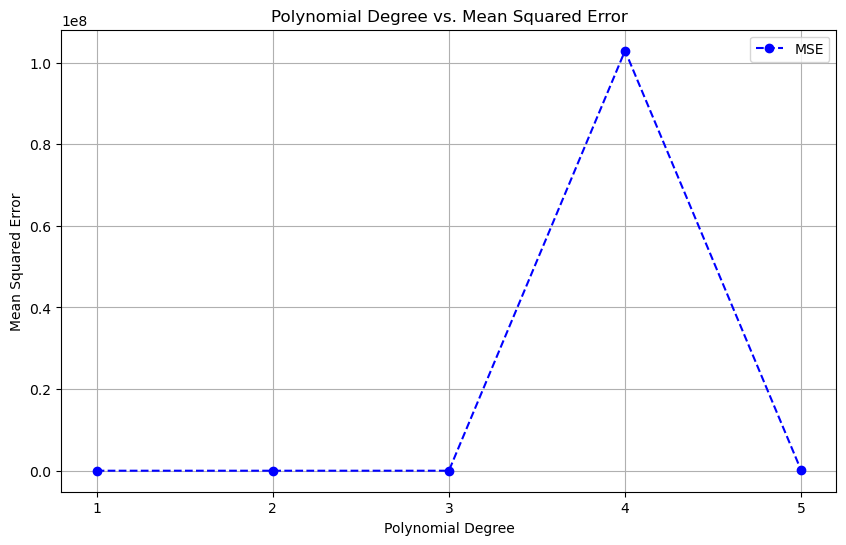

In [9]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Helper function to evaluate the model
def evaluate_model(model, X_test, y_test, degree):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Polynomial Regression (Degree {degree}) - MSE: {mse:.4f}, R²: {r2:.4f}")
    return mse, r2

# Range of polynomial degrees to try
degrees = range(1, 6)  # Testing degrees from 1 to 5
results = []

# Iterate over polynomial degrees to find the best one
for degree in degrees:
    # Create a pipeline with polynomial features and linear regression
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Train the model on the training data
    poly_model.fit(X_train_standard_scaled, y_train)
    
    # Evaluate the model on the test data
    mse, r2 = evaluate_model(poly_model, X_test_standard_scaled, y_test, degree)
    
    # Save the results for comparison
    results.append((degree, mse, r2))

# Find the best polynomial degree based on MSE
best_degree, best_mse, best_r2 = min(results, key=lambda x: x[1])
print(f"\nBest Polynomial Degree: {best_degree} with MSE: {best_mse:.4f} and R²: {best_r2:.4f}")

# Plot the performance (MSE) vs. Polynomial Degree
degrees, mses, r2s = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(degrees, mses, marker='o', linestyle='--', color='b', label='MSE')
plt.title('Polynomial Degree vs. Mean Squared Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()


Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best Hyperparameters for SVR: {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
SVR Performance - MSE: 44.3308, R²: 0.7357


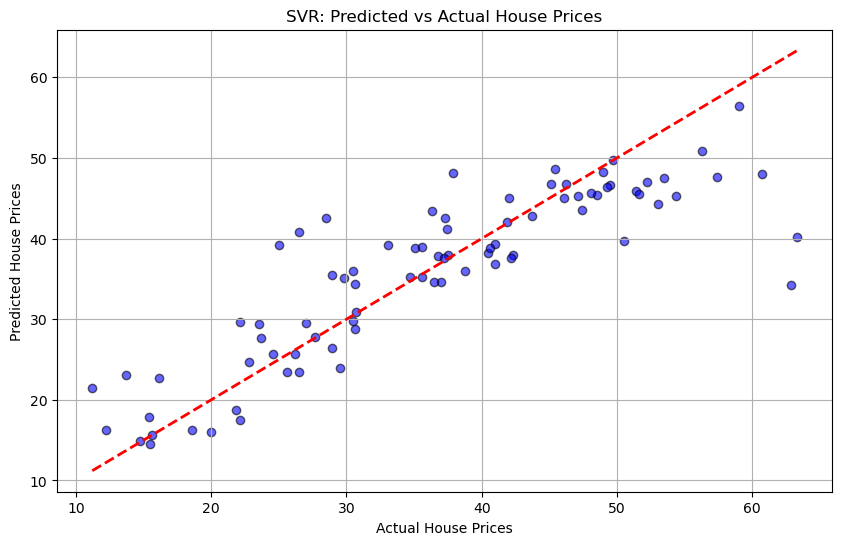

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Helper function to evaluate the model
def evaluate_svr_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"SVR Performance - MSE: {mse:.4f}, R²: {r2:.4f}")
    return mse, r2

# Parameter grid for GridSearchCV to tune hyperparameters
param_grid = {
    'kernel': ['rbf', 'poly'],        # Trying RBF and Polynomial kernels
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient for RBF, Poly
    'degree': [2, 3, 4]               # Degrees for Polynomial kernel (only used if kernel='poly')
}

# Create SVR model
svr = SVR()

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_standard_scaled, y_train)

# Get the best model and its hyperparameters
best_svr_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters for SVR: {best_params}")

# Evaluate the best model on the test data
best_mse, best_r2 = evaluate_svr_model(best_svr_model, X_test_standard_scaled, y_test)

# Plotting SVR Predictions vs True Values
import matplotlib.pyplot as plt

# Predicting with the best model
y_pred = best_svr_model.predict(X_test_standard_scaled)

# Scatter plot for predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('SVR: Predicted vs Actual House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.grid(True)
plt.show()


Evaluating Polynomial Regression Model:
Best Polynomial Regression (Degree 2) Performance:
Mean Squared Error (MSE): 41.9931
R² Score: 0.7497

Evaluating Support Vector Regression Model:
Best Support Vector Regression (SVR) Performance:
Mean Squared Error (MSE): 44.3308
R² Score: 0.7357

Comparison Summary:
Best Polynomial Regression (Degree 2):
  - MSE = 41.9931
  - R² = 0.7497
Best Support Vector Regression (SVR):
  - MSE = 44.3308
  - R² = 0.7357


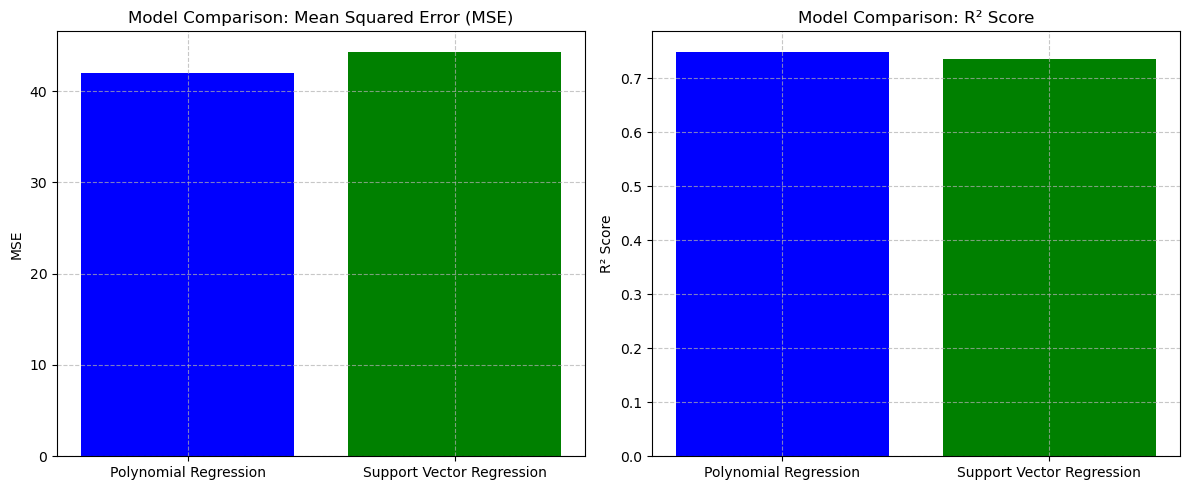

In [12]:
# Assuming best_poly_model is the model we trained with the best degree
# This is where you should define the best polynomial model
best_poly_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_poly_model.fit(X_train_standard_scaled, y_train)

# Now we can evaluate both models

# Evaluate the best Polynomial Regression model
print("Evaluating Polynomial Regression Model:")
poly_mse, poly_r2 = evaluate_model(best_poly_model, X_test_standard_scaled, y_test, f"Best Polynomial Regression (Degree {best_degree})")

# Evaluate the best Support Vector Regression (SVR) model
print("Evaluating Support Vector Regression Model:")
svr_mse, svr_r2 = evaluate_model(best_svr_model, X_test_standard_scaled, y_test, "Best Support Vector Regression (SVR)")

# Comparison of Models
print("Comparison Summary:")
print(f"Best Polynomial Regression (Degree {best_degree}):")
print(f"  - MSE = {poly_mse:.4f}")
print(f"  - R² = {poly_r2:.4f}")

print(f"Best Support Vector Regression (SVR):")
print(f"  - MSE = {svr_mse:.4f}")
print(f"  - R² = {svr_r2:.4f}")

# Visualizing the Comparison
models = ['Polynomial Regression', 'Support Vector Regression']
mse_values = [poly_mse, svr_mse]
r2_values = [poly_r2, svr_r2]

# Plotting the MSE and R² comparison
plt.figure(figsize=(12, 5))

# Plot MSE Comparison
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Model Comparison: Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot R² Comparison
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('Model Comparison: R² Score')
plt.ylabel('R² Score')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
